In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("random_forest_classifier_promotion_800.csv")
df

,Age,Experience_Years,Education_Level,Department,Working_Hours,Performance_Score,Promotion_Status
0,56,13,PhD,HR,49,2.86,0
1,46,6,HighSchool,Finance,57,2.37,0
2,32,2,PhD,Finance,30,9.10,0
3,25,22,Master,Marketing,55,7.39,1
4,38,17,Bachelor,IT,36,9.44,0
...,...,...,...,...,...,...,...
795,40,16,HighSchool,Sales,30,4.75,0
796,31,19,Bachelor,Sales,52,2.51,0
797,41,35,Master,HR,54,5.27,0
798,19,8,HighSchool,HR,53,1.50,0


In [3]:
education = LabelEncoder()
department = LabelEncoder()

df["Education_Level"] = education.fit_transform(df["Education_Level"])
df["Department"] = department.fit_transform(df["Department"])
df

,Age,Experience_Years,Education_Level,Department,Working_Hours,Performance_Score,Promotion_Status
0,56,13,3,1,49,2.86,0
1,46,6,1,0,57,2.37,0
2,32,2,3,0,30,9.10,0
3,25,22,2,3,55,7.39,1
4,38,17,0,2,36,9.44,0
...,...,...,...,...,...,...,...
795,40,16,1,4,30,4.75,0
796,31,19,0,4,52,2.51,0
797,41,35,2,1,54,5.27,0
798,19,8,1,1,53,1.50,0


In [4]:
x = df.drop("Promotion_Status",axis = 1)
y = df["Promotion_Status"]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state=45)

In [6]:
model = RandomForestClassifier(n_estimators=100 ,  random_state= 40)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
x_pred = model.predict(x_test)
x_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
accuracy = accuracy_score(x_pred,y_test)
accuracy

0.9708333333333333

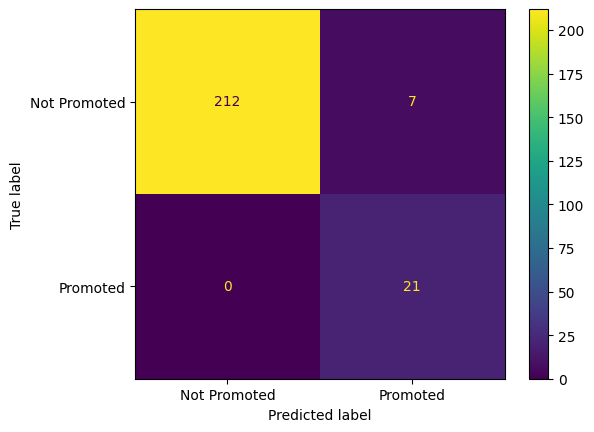

In [9]:
con_matrix = confusion_matrix(x_pred,y_test)
display = ConfusionMatrixDisplay(confusion_matrix= con_matrix  , display_labels = ["Not Promoted", "Promoted"])
display.plot()
plt.show()

In [10]:
new_education = education.transform(["Master"])[0]
new_department = department.transform(["Sales"])[0]

new_data = np.array([[27, 3, new_education , new_department , 8, 8.5]])

In [11]:
a = model.predict(new_data)
if a[0] == 1:
    print(" get Promotion")
else:
    print("will not get promotion")

will not get promotion


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
